<center><img src='https://drive.google.com/uc?id=1_utx_ZGclmCwNttSe40kYA6VHzNocdET' height="60"></center>

AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Program Operacyjny Polska Cyfrowa na lata 2014-2020
<hr>

<center><img src='https://drive.google.com/uc?id=1BXZ0u3562N_MqCLcekI-Ens77Kk4LpPm'></center>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

Code based on https://github.com/pytorch/examples/blob/master/mnist/main.py

In this exercise we are using high level abstractions from torch.nn like nn.Linear.
Note: during the next lab session we will go one level deeper and implement more things
with bare hands.

Tasks:

    1. Read the code.

    2. Check that the given implementation reaches 95% test accuracy for architecture input-128-128-10 after few epochs.

    3. Add the option to use SGD with momentum instead of ADAM.

    4. Experiment with different learning rates, plot the learning curves for different
    learning rates for both ADAM and SGD with momentum.

    5. Parameterize the constructor by a list of sizes of hidden layers of the MLP.
    Note that this requires creating a list of layers as an atribute of the Net class,
    and one can't use a standard python list containing nn.Modules (why?).
    Check torch.nn.ModuleList.


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # After flattening an image of size 28x28 we have 784 inputs
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        output = F.log_softmax(x, dim=1)
        return output


def train(model, device, train_loader, optimizer, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    
    return correct / len(test_loader.dataset)



In [3]:
batch_size = 256
test_batch_size = 1000
epochs = 5
lr = 1e-2
seed = 1
log_interval = 10
use_cuda = torch.cuda.is_available()

In [4]:
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': batch_size}
test_kwargs = {'batch_size': test_batch_size}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

In [5]:
transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
    ])
dataset1 = datasets.MNIST('../data', train=True, download=True,
                    transform=transform)
dataset2 = datasets.MNIST('../data', train=False,
                    transform=transform)
train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)

2. Check that the given implementation reaches 95% test accuracy for architecture input-128-128-10 after few epochs.

In [6]:
model = Net().to(device)
optimizer = optim.Adam(model.parameters(), lr=lr)

provided_net_accuracy = []

for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch, log_interval)
    provided_net_accuracy.append(test(model, device, test_loader))

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.313259
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.732760
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.582761
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.481087
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.334523
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.346265
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.229349
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.191099
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.224889
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.244064
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.236049
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.241033
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.194208
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.302404
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.203934
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.192445
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.173173
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.140804
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.356526
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.130328
Train Epoc

  3. Add the option to use SGD with momentum instead of ADAM.


In [7]:
model2 = Net().to(device)
optimizer2 = optim.SGD(model2.parameters(), lr=lr, momentum=0.95)

for epoch in range(1, epochs + 1):
    train(model2, device, train_loader, optimizer2, epoch, log_interval)
    test(model2, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297579
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.194206
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.830583
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.151425
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.561842
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.649637
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.362383
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.346002
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.512563
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.397074
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.378667
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.503401
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.385932
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.363953
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.320298
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.298104
Train Epoch: 1 [40960/60000 (68%)]	Loss: 0.300542
Train Epoch: 1 [43520/60000 (72%)]	Loss: 0.255723
Train Epoch: 1 [46080/60000 (77%)]	Loss: 0.390671
Train Epoch: 1 [48640/60000 (81%)]	Loss: 0.150856
Train Epoc

4. Experiment with different learning rates, plot the learning curves for different
    learning rates for both ADAM and SGD with momentum.

In [8]:
min_lr = 0.005
max_lr = 0.025
n_lr = 5
sgd_momentum = 0.9

lr_log_interval = 115

learning_rates = [round(x * ((max_lr - min_lr) / (n_lr - 1)) + min_lr, 3) for x in range(n_lr)]

lr_accuracy_sgd = {}
lr_accuracy_adam = {}

print(learning_rates)

[0.005, 0.01, 0.015, 0.02, 0.025]


In [9]:
for learning_rate in learning_rates:
    print(learning_rate)
    model_sgd = Net().to(device)
    sgd_optimizer = optim.SGD(model_sgd.parameters(), lr=learning_rate, momentum=sgd_momentum)
    sgd_accuracy = []
    
    model_adam = Net().to(device)
    adam_optimizer = optim.Adam(model_adam.parameters(), lr=learning_rate)
    adam_accuracy = []
    
    for epoch in range(1, epochs + 1):
        train(model_adam, device, train_loader, adam_optimizer, epoch, lr_log_interval)
        adam_accuracy.append(test(model_adam, device, test_loader))
        
        train(model_sgd, device, train_loader, sgd_optimizer, epoch, lr_log_interval)
        sgd_accuracy.append(test(model_sgd, device, test_loader))
        
    lr_accuracy_sgd[learning_rate] = sgd_accuracy
    lr_accuracy_adam[learning_rate] = adam_accuracy


print("sgd: ", lr_accuracy_sgd)
print("adam: ", lr_accuracy_adam)


0.005
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.292853
Train Epoch: 1 [29440/60000 (49%)]	Loss: 0.188669
Train Epoch: 1 [58880/60000 (98%)]	Loss: 0.036438

Test set: Average loss: 0.2057, Accuracy: 9313/10000 (93%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.299345
Train Epoch: 1 [29440/60000 (49%)]	Loss: 0.437326
Train Epoch: 1 [58880/60000 (98%)]	Loss: 0.094941

Test set: Average loss: 0.3243, Accuracy: 9063/10000 (91%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.217585
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.067767
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.004512

Test set: Average loss: 0.1286, Accuracy: 9616/10000 (96%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.319675
Train Epoch: 2 [29440/60000 (49%)]	Loss: 0.243473
Train Epoch: 2 [58880/60000 (98%)]	Loss: 0.057007

Test set: Average loss: 0.2547, Accuracy: 9266/10000 (93%)

Train Epoch: 3 [0/60000 (0%)]	Loss: 0.137910
Train Epoch: 3 [29440/60000 (49%)]	Loss: 0.067167
Train Epoch: 3 [58880/60000 (98%)]	Loss: 0.007931

Test set: Average loss: 

In [10]:
from clearml import Task, Logger
task = Task.init(project_name="DNN", task_name="Lab 3 - pytorch")

ClearML Task: created new task id=dd6450c2b9c641f292dc38abc040deec
2023-11-22 01:52:17,136 - clearml.Task - INFO - Storing jupyter notebook directly as code
ClearML results page: https://app.clear.ml/projects/6d5d3af9d7ed409da0bb697700672a75/experiments/dd6450c2b9c641f292dc38abc040deec/output/log


In [11]:
import numpy as np

def create_plots(task=task, sgd_accuracy=lr_accuracy_sgd, adam_accuracy=lr_accuracy_adam):
    logger = task.get_logger()
    for learn_rate, accuracy in sgd_accuracy.items():
        sgd_hstack = np.hstack((np.atleast_2d(np.arange(1, len(accuracy) + 1)).T, np.atleast_2d(np.array(accuracy)).T))
        logger.report_scatter2d(
            "learn rate comparison",
            "sgd " + str(learn_rate),
            scatter=sgd_hstack,
            xaxis="epoch",
            yaxis="accuracy"
        )
    for learn_rate, accuracy in adam_accuracy.items():
        adam_hstack = np.hstack((np.atleast_2d(np.arange(1, len(accuracy) + 1)).T, np.atleast_2d(np.array(accuracy)).T))
        logger.report_scatter2d(
            "learn rate comparison",
            "adam " + str(learn_rate),
            scatter=adam_hstack,
            xaxis="epoch",
            yaxis="accuracy"
        )



create_plots()

In [2]:
from IPython.display import HTML

HTML(filename="plot.html")

5. Parameterize the constructor by a list of sizes of hidden layers of the MLP.
    Note that this requires creating a list of layers as an atribute of the Net class,
    and one can't use a standard python list containing nn.Modules (why?).
    Check torch.nn.ModuleList.

We can't use python list of nn.Modules because model.parameters() won't work

In [12]:
class NetParameterized(nn.Module):
    def __init__(self, hidden_layers):
        super(NetParameterized, self).__init__()
        # After flattening an image of size 28x28 we have 784 inputs
        last_layer = 784
        linears = []
        for current_layer in hidden_layers:
            print(f"Created layer: ({last_layer}, {current_layer})")
            linears.append(nn.Linear(last_layer, current_layer))
            last_layer = current_layer
        self.linears = nn.ModuleList(linears)

    def forward(self, x):
        x = torch.flatten(x, 1)
        for layer in self.linears[:-1]:
            x = layer(x)
            x = F.relu(x)
        x = self.linears[-1](x)
        output = F.log_softmax(x, dim=1)
        return output

In [19]:
modelParameterized = NetParameterized([512, 256, 128, 96, 64, 32, 10]).to(device)
optimizer = optim.Adam(modelParameterized.parameters(), lr=lr)

parameterized_net_accuracy = []

for epoch in range(1, epochs + 1):
    train(modelParameterized, device, train_loader, optimizer, epoch, log_interval)
    parameterized_net_accuracy.append(test(modelParameterized, device, test_loader))

Created layer: (784, 512)
Created layer: (512, 256)
Created layer: (256, 128)
Created layer: (128, 96)
Created layer: (96, 64)
Created layer: (64, 32)
Created layer: (32, 10)
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.314109
Train Epoch: 1 [2560/60000 (4%)]	Loss: 1.735290
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.254255
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.086724
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.977643
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.986996
Train Epoch: 1 [15360/60000 (26%)]	Loss: 0.654195
Train Epoch: 1 [17920/60000 (30%)]	Loss: 0.493050
Train Epoch: 1 [20480/60000 (34%)]	Loss: 0.653174
Train Epoch: 1 [23040/60000 (38%)]	Loss: 0.511010
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.461986
Train Epoch: 1 [28160/60000 (47%)]	Loss: 0.383572
Train Epoch: 1 [30720/60000 (51%)]	Loss: 0.503253
Train Epoch: 1 [33280/60000 (55%)]	Loss: 0.369749
Train Epoch: 1 [35840/60000 (60%)]	Loss: 0.302052
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.297550
Train Epoch: 1 [40960/60000 (68%)]	

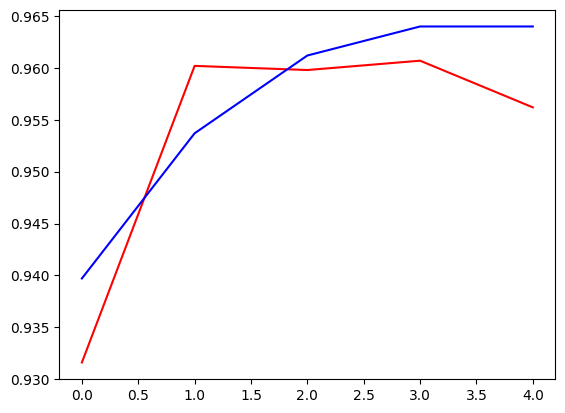

In [20]:
import matplotlib.pyplot as plt

plt.plot(provided_net_accuracy, 'r')
plt.plot(parameterized_net_accuracy, 'b')
plt.show()